In [111]:
# for the sine function, what does the typical plot look like?
import numpy as np

step_size = 0.01
xs = np.arange(0,20,step_size)
ys = 2*np.sin(4*xs) + 3*np.cos(2*xs) ## more quasiperiodic type signal
#ys = np.sin(2*np.pi*xs) ## exactly periodic

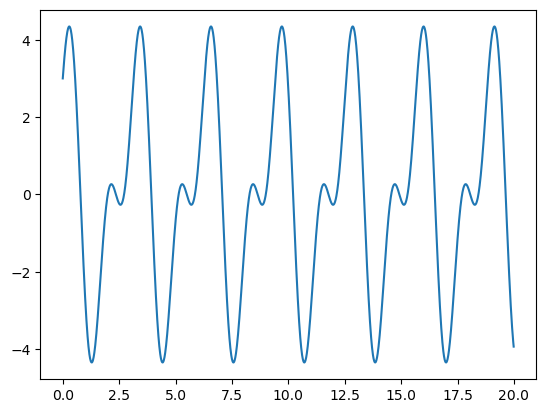

In [113]:
import matplotlib.pyplot as plt
plt.plot(xs, ys)

In [114]:
def sliding_window(time_series, d, tau):
    ''' Given a time series, return [f(t), f(t + tau), f(t + 2 * tau), ..., f(t + d * tau)];
    i.e. return a sliding window embedding'''
    sw_embedding = []
    for i in range(len(time_series) - ((d - 1) * tau)):  # -1 b/c python loop ends at last index
        sw_embedding.append(time_series[i:i + d * tau:tau])
    return sw_embedding

In [115]:
from ripser import ripser
import sys
sys.path.append('../data/simple_egs')
import SphereExample as sphere

T = np.pi
window_length_test_values = np.linspace(0,5.0*T,40)[1:]
dim_test_values = range(5,7)

mpers_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
top_diff_results = np.zeros((len(window_length_test_values),len(dim_test_values)))
PD_results = {}

for i,wl in enumerate(window_length_test_values):
    for j,d in enumerate(dim_test_values):
        print(wl/T,d)
        
        tau = wl/d
    
        # construct a sliding window embedding
        swe = sliding_window(ys, d=d, tau= int(wl/(d*step_size)) )
        
        PDs = ripser(np.array(swe), maxdim=1, coeff=5)['dgms']
        
        PD_results[i,j] = PDs[1]
        res = (sphere.get_maximum_persistence(PDs)[1],
               sphere.get_top_diff_persistence(PDs)[1],
               sphere.get_num_features(PDs)[1])
        

        mpers_results[i,j] = res[0]
        top_diff_results[i,j] = res[1]

0.12820512820512822 5
0.12820512820512822 6
0.25641025641025644 5
0.25641025641025644 6
0.38461538461538464 5
0.38461538461538464 6
0.5128205128205129 5
0.5128205128205129 6
0.6410256410256411 5
0.6410256410256411 6
0.7692307692307693 5
0.7692307692307693 6
0.8974358974358975 5
0.8974358974358975 6
1.0256410256410258 5
1.0256410256410258 6
1.153846153846154 5
1.153846153846154 6
1.2820512820512822 5
1.2820512820512822 6
1.4102564102564104 5
1.4102564102564104 6
1.5384615384615385 5
1.5384615384615385 6
1.6666666666666667 5
1.6666666666666667 6
1.794871794871795 5
1.794871794871795 6
1.9230769230769231 5
1.9230769230769231 6
2.0512820512820515 5
2.0512820512820515 6
2.1794871794871797 5
2.1794871794871797 6
2.307692307692308 5
2.307692307692308 6
2.435897435897436 5
2.435897435897436 6
2.5641025641025643 5
2.5641025641025643 6
2.6923076923076925 5
2.6923076923076925 6
2.8205128205128207 5
2.8205128205128207 6
2.948717948717949 5
2.948717948717949 6
3.076923076923077 5
3.076923076923077 

<Figure size 640x480 with 0 Axes>

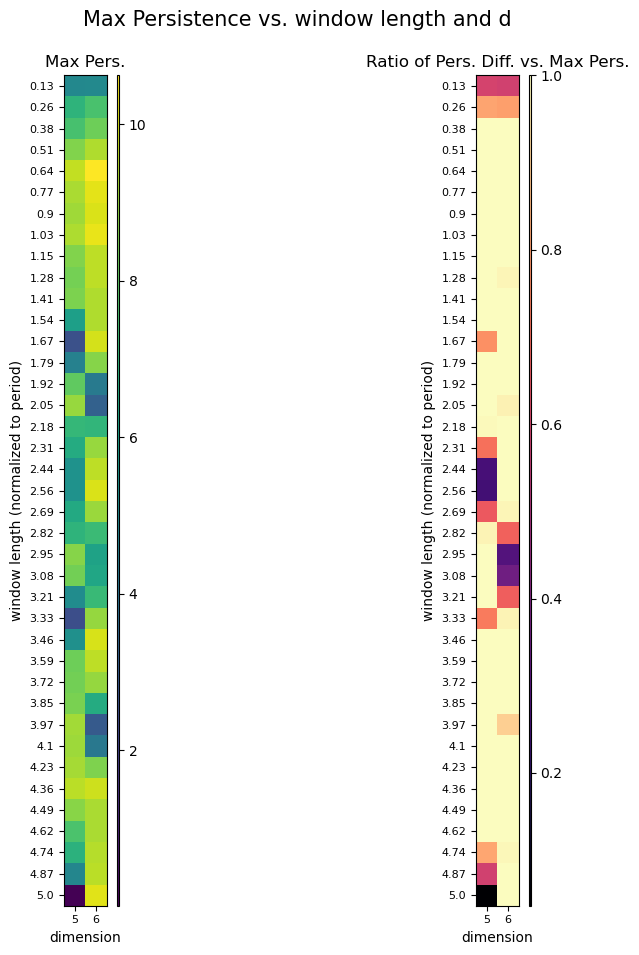

In [116]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.gcf().clear()
fig, axs = plt.subplots(1,2, figsize = (10,10))

ticksize = 8

im1 = axs[0].imshow(mpers_results)

axs[0].set_xlabel('dimension')
axs[0].set_xticks(np.arange(len(dim_test_values)))
axs[0].set_xticklabels(labels = list(dim_test_values),fontsize = ticksize)

axs[0].set_ylabel('window length (normalized to period)')
axs[0].set_yticks(np.arange(len(window_length_test_values)))
axs[0].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)

axs[0].set_title('Max Pers.')

divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1,cax1,orientation = 'vertical')

### Do the other plot ###

im2 = axs[1].imshow(np.divide(top_diff_results,mpers_results),cmap = plt.cm.magma)

axs[1].set_xlabel('dimension')
axs[1].set_xticks(np.arange(len(dim_test_values)))
axs[1].set_xticklabels(labels = list(dim_test_values), fontsize = ticksize)


axs[1].set_ylabel('window length (normalized to period)')
axs[1].set_yticks(np.arange(len(window_length_test_values)))
axs[1].set_yticklabels(labels = list(np.around(window_length_test_values/T,2)),fontsize = ticksize)
axs[1].set_title('Ratio of Pers. Diff. vs. Max Pers.')

divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2,cax2)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

fig.suptitle('Max Persistence vs. window length and d', fontsize = 15)
plt.savefig('periodic_baseline.png')

plt.show()

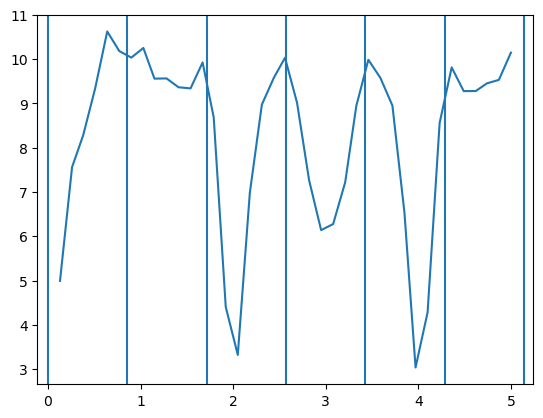

In [124]:
fig,ax = plt.subplots()
ax.plot(np.around(window_length_test_values/T,2),mpers_results[:,-1])
scale = 6.0/7.0
for x in scale*np.arange(0,7):
    ax.axvline(x)
plt.show()

In [118]:
from persim import plot_diagrams
#plot_diagrams(PD_results[2,3])

### Utilize some sort of multidimensional scaling?

In [130]:
wl = 3.05*T
d = 6
swe = sliding_window(ys, d=d, tau= int(wl/(d*step_size)) )
PDs = ripser(np.array(swe), maxdim=1, coeff=5)['dgms']

In [131]:
max(PDs[1][:,1] - PDs[1][:,0])

5.937445729970932

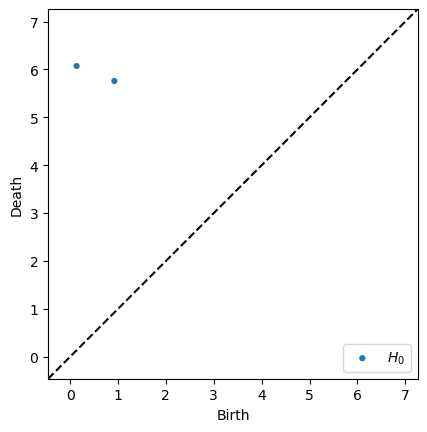

In [132]:
plot_diagrams(PDs[1])

In [133]:
from sklearn.manifold import MDS

embedding = MDS(n_components=3)
X_transformed = embedding.fit_transform(np.array(swe)[:800,:])
X_transformed.shape

(800, 3)

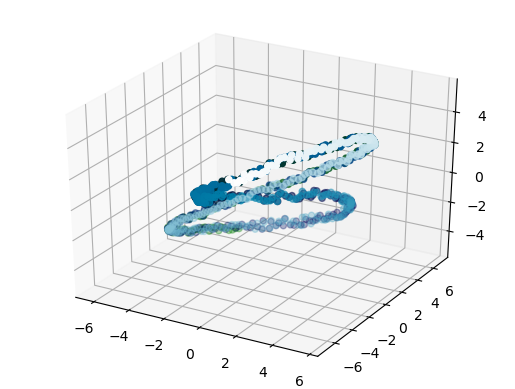

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],
           c = np.linspace(0,1,X_transformed.shape[0]),
           cmap = plt.cm.ocean)